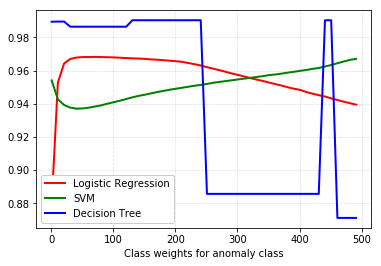

In [17]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'validation'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:4] + mode +'.png', dpi = 600)

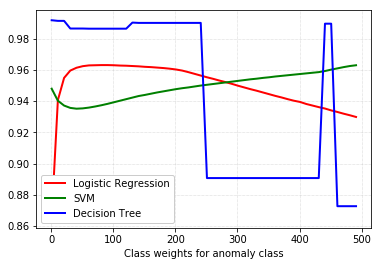

In [18]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'train'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

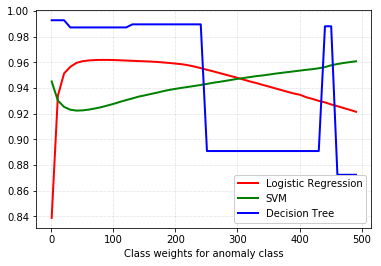

In [22]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

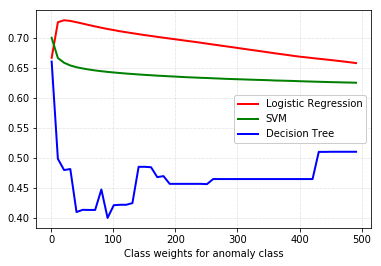

In [23]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'validation'
filename = 'm2.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

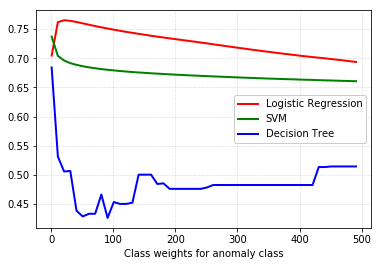

In [24]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'train'
filename = 'm2.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

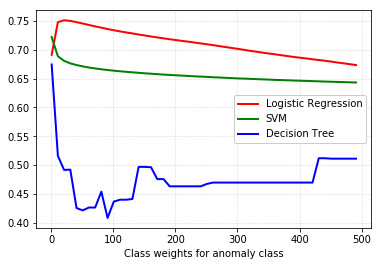

In [25]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'm2.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

Number of fraudulent transactions  8213


C:\Users\28472\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


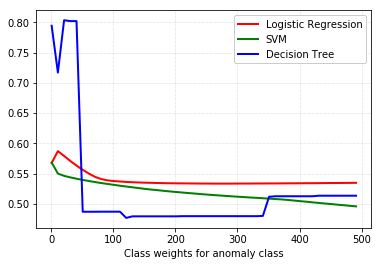

In [30]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'full_data.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [8,9,10,11,12,13,14] , header = 0)
   
results = list(map(int, df['Anomaly'])) 
print('Number of fraudulent transactions ' , sum(results))

features = ['Transaction_Type', 'Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']

# Separating out the features and target variables
X = df.loc[:, features].values
y = df.loc[:, targets].values
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(X).toarray() 

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 

y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

Number of fraudulent transactions  8213


C:\Users\28472\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


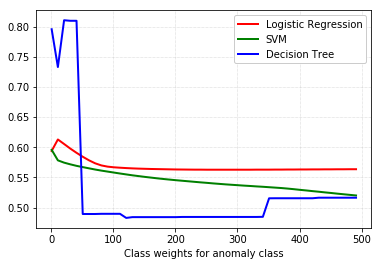

In [31]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'train'
filename = 'full_data.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [8,9,10,11,12,13,14] , header = 0)
   
results = list(map(int, df['Anomaly'])) 
print('Number of fraudulent transactions ' , sum(results))

features = ['Transaction_Type', 'Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']

# Separating out the features and target variables
X = df.loc[:, features].values
y = df.loc[:, targets].values
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(X).toarray() 

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 
    
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

Number of fraudulent transactions  8213


C:\Users\28472\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


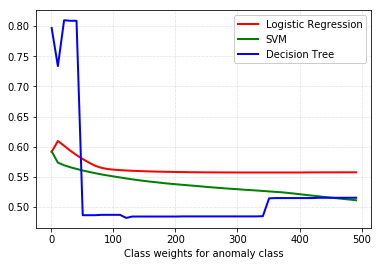

In [32]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'validation'
filename = 'full_data.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [8,9,10,11,12,13,14] , header = 0)
   
results = list(map(int, df['Anomaly'])) 
print('Number of fraudulent transactions ' , sum(results))

features = ['Transaction_Type', 'Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']

# Separating out the features and target variables
X = df.loc[:, features].values
y = df.loc[:, targets].values
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(X).toarray() 

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 
    
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

In [2]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
mode = 'validation'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2

df = pd.read_csv(filename, usecols = [8,9,10,11,12,13,14] , header = 0)
   
results = list(map(int, df['Anomaly'])) 
print('Number of fraudulent transactions ' , sum(results))

features = ['Transaction_Type', 'Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']

# Separating out the features and target variables
X = df.loc[:, features].values
y = df.loc[:, targets].values
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(X).toarray() 

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 
    
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:-4] + mode +'.png', dpi = 600)

Number of fraudulent transactions  4097


C:\Users\28472\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


ValueError: X has 6 features per sample; expecting 5

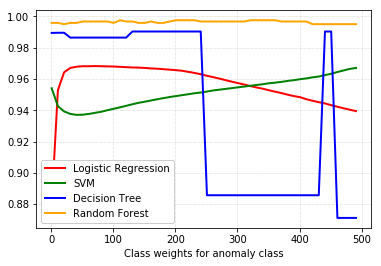

In [6]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier

def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
def area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/rfc_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    rfc = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = rfc.predict(X_val)
        rfc_prc[0] = y_val
        rfc_prc[1] = y_val_pred_prob   
        y_val_pred = rfc.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = rfc.predict_proba(X_train)
        rfc_prc[0] = y_train
        rfc_prc[1] = y_train_pred_prob   
        y_train_pred = rfc.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_rfc, rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = rfc.predict_proba(X_test)
        rfc_prc[0] = y_test
        rfc_prc[1] = y_test_pred_prob   
        y_test_pred = rfc.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area     
    
mode = 'validation'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []
area_rfc = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2
rfc_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_rfc.append(area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
plt.plot(class_weights, area_rfc, linestyle = 'solid', color = 'orange', label = 'Random Forest', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:4] + mode +'.png', dpi = 600)

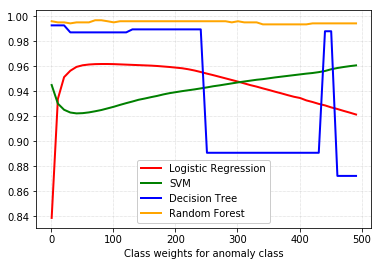

In [9]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier

def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
def area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/rfc_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    rfc = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = rfc.predict(X_val)
        rfc_prc[0] = y_val
        rfc_prc[1] = y_val_pred_prob   
        y_val_pred = rfc.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = rfc.predict(X_train)
        rfc_prc[0] = y_train
        rfc_prc[1] = y_train_pred_prob   
        y_train_pred = rfc.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_rfc, rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = rfc.predict(X_test)
        rfc_prc[0] = y_test
        rfc_prc[1] = y_test_pred_prob   
        y_test_pred = rfc.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'm3.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []
area_rfc = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2
rfc_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_rfc.append(area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
plt.plot(class_weights, area_rfc, linestyle = 'solid', color = 'orange', label = 'Random Forest', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:4] + mode +'.png', dpi = 600)

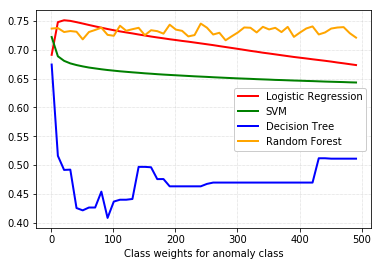

In [10]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier

def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
def area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/rfc_' + filename[:3] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    rfc = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = rfc.predict(X_val)
        rfc_prc[0] = y_val
        rfc_prc[1] = y_val_pred_prob   
        y_val_pred = rfc.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = rfc.predict(X_train)
        rfc_prc[0] = y_train
        rfc_prc[1] = y_train_pred_prob   
        y_train_pred = rfc.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_rfc, rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = rfc.predict(X_test)
        rfc_prc[0] = y_test
        rfc_prc[1] = y_test_pred_prob   
        y_test_pred = rfc.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'm2.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []
area_rfc = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2
rfc_prc = [0]*2

df = pd.read_csv(filename, usecols = [9,10,11,12,13,14] , header = 0)
features = ['Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']
# Separating out the features and target variables
x = df.loc[:, features].values
y = df.loc[:, targets].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_rfc.append(area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
plt.plot(class_weights, area_rfc, linestyle = 'solid', color = 'orange', label = 'Random Forest', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:4] + mode +'.png', dpi = 600)

Number of fraudulent transactions  8213


C:\Users\28472\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


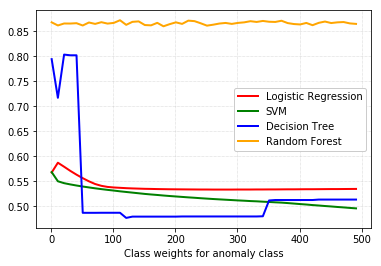

In [12]:
import numpy as np
import pandas as pd
import csv
import sys
import os
   
import matplotlib.pyplot as plt    

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
import pickle

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier

def area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    
    model_file = './models/lr_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    lr = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = lr.decision_function(X_val)
        lr_prc[0] = y_val
        lr_prc[1] = y_val_pred_prob   
        y_val_pred = lr.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = lr.decision_function(X_train)
        lr_prc[0] = y_train
        lr_prc[1] = y_train_pred_prob   
        y_train_pred = lr.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = lr.decision_function(X_test)
        lr_prc[0] = y_test
        lr_prc[1] = y_test_pred_prob   
        y_test_pred = lr.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_lr , rec_lr, thresh_lr = precision_recall_curve(lr_prc[0], lr_prc[1],pos_label = 1)
        area = auc(rec_lr, pre_lr)
        area = round(area,4)
        return area    
    
 
def area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/svm_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    svm = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = svm.decision_function(X_val)
        svm_prc[0] = y_val
        svm_prc[1] = y_val_pred_prob   
        y_val_pred = svm.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = svm.decision_function(X_train)
        svm_prc[0] = y_train
        svm_prc[1] = y_train_pred_prob   
        y_train_pred = svm.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = svm.decision_function(X_test)
        svm_prc[0] = y_test
        svm_prc[1] = y_test_pred_prob   
        y_test_pred = svm.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(svm_prc[0], svm_prc[1],pos_label = 1)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return area 

    
 
def area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/dt_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    dt = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = dt.predict(X_val)
        dt_prc[0] = y_val
        dt_prc[1] = y_val_pred_prob   
        y_val_pred = dt.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = dt.predict(X_train)
        dt_prc[0] = y_train
        dt_prc[1] = y_train_pred_prob   
        y_train_pred = dt.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_dt, rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = dt.predict(X_test)
        dt_prc[0] = y_test
        dt_prc[1] = y_test_pred_prob   
        y_test_pred = dt.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_dt , rec_dt, thresh_dt = precision_recall_curve(dt_prc[0], dt_prc[1],pos_label = 1)
        area = auc(rec_dt, pre_dt)
        area = round(area,4)
        return area     
    
def area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test):
    dataset = ''
    model_file = ''
    model_file = './models/rfc_' + filename[:-4] + '/' + str(weights) +'.sav'
    dataset = 'Transfer'

    rfc = pickle.load(open(model_file, 'rb'))

    if mode == 'validation':
        y_val_pred_prob = rfc.predict(X_val)
        rfc_prc[0] = y_val
        rfc_prc[1] = y_val_pred_prob   
        y_val_pred = rfc.predict(X_val)
        precision,recall,fscore,support=score(y_val,y_val_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'train':
        y_train_pred_prob = rfc.predict(X_train)
        rfc_prc[0] = y_train
        rfc_prc[1] = y_train_pred_prob   
        y_train_pred = rfc.predict(X_train)
        precision,recall,fscore,support=score(y_train,y_train_pred,average=None)
        
        pre_rfc, rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area
    
    if mode == 'test':
        y_test_pred_prob = rfc.predict(X_test)
        rfc_prc[0] = y_test
        rfc_prc[1] = y_test_pred_prob   
        y_test_pred = rfc.predict(X_test)
        precision,recall,fscore,support=score(y_test,y_test_pred,average=None)
        
        pre_rfc , rec_rfc, thresh_rfc = precision_recall_curve(rfc_prc[0], rfc_prc[1],pos_label = 1)
        area = auc(rec_rfc, pre_rfc)
        area = round(area,4)
        return area     
    
mode = 'test'
filename = 'full_data.csv'

class_weights = []
area_lr = []
area_svm = []
area_dt = []
area_rfc = []

lr_prc = [0]*2
svm_prc = [0]*2
dt_prc = [0]*2
rfc_prc = [0]*2

df = pd.read_csv(filename, usecols = [8,9,10,11,12,13,14] , header = 0)
   
results = list(map(int, df['Anomaly'])) 
print('Number of fraudulent transactions ' , sum(results))

features = ['Transaction_Type', 'Airfare', 'Lodging', 'Meals', 'Other_Transportation', 'Other_Expenses']
targets = ['Anomaly']

# Separating out the features and target variables
X = df.loc[:, features].values
y = df.loc[:, targets].values
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(X).toarray() 

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 

y  = [i for j in y for i in j]

#Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Stratified sampling based on Y
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=42)
# Create 15% validation set and 15% test set split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,stratify=y_test , test_size=0.50, random_state=42)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

for weights in range(1,500,10):
    class_weights.append(weights)
    area_lr.append(area_lr_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_svm.append(area_svm_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_dt.append(area_dt_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
    area_rfc.append(area_rfc_calc(filename, mode, weights, X_train, y_train, X_val, X_test, y_val, y_test))
        
#print(class_weights)
#print(area_lr)


plt.clf()
plt.xlabel('Class weights for anomaly class')
plt.plot(class_weights, area_lr, linestyle = 'solid', color = 'r', label = 'Logistic Regression', linewidth = "2")
plt.plot(class_weights, area_svm, linestyle = 'solid', color = 'g', label = 'SVM', linewidth = "2")
plt.plot(class_weights, area_dt, linestyle = 'solid', color = 'b', label = 'Decision Tree', linewidth = "2")
plt.plot(class_weights, area_rfc, linestyle = 'solid', color = 'orange', label = 'Random Forest', linewidth = "2")
      
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(facecolor = "white", framealpha = 1)
plt.grid(True)
plt.grid(which = "major", linestyle = ":", linewidth = "0.5")
plt.savefig('./' + filename[:4] + mode +'.png', dpi = 600)